In [1]:
import pandas as pd


best_1 = pd.read_csv('/opt/ml/image-classification-level1-12/templates/pro_hun/output/sub/sub_2021-08-25_092537.csv')
best_2 = pd.read_csv('/opt/ml/image-classification-level1-12/templates/pro_hun/output/sub/sub_2021-08-25_145639.csv')

In [2]:
compare_df = pd.merge(best_1, best_2, on='ImageID', how='left')

In [3]:
compare_df['ImageID'] = compare_df['ImageID'].apply(lambda x: os.path.join('/opt/ml/image-classification-level1-12/templates/data/eval/images', x))

In [4]:
compare_df['wrong_img'] = compare_df.apply(lambda x : 1 if (x['ans_x']!=x['ans_y']) else 0, axis=1)

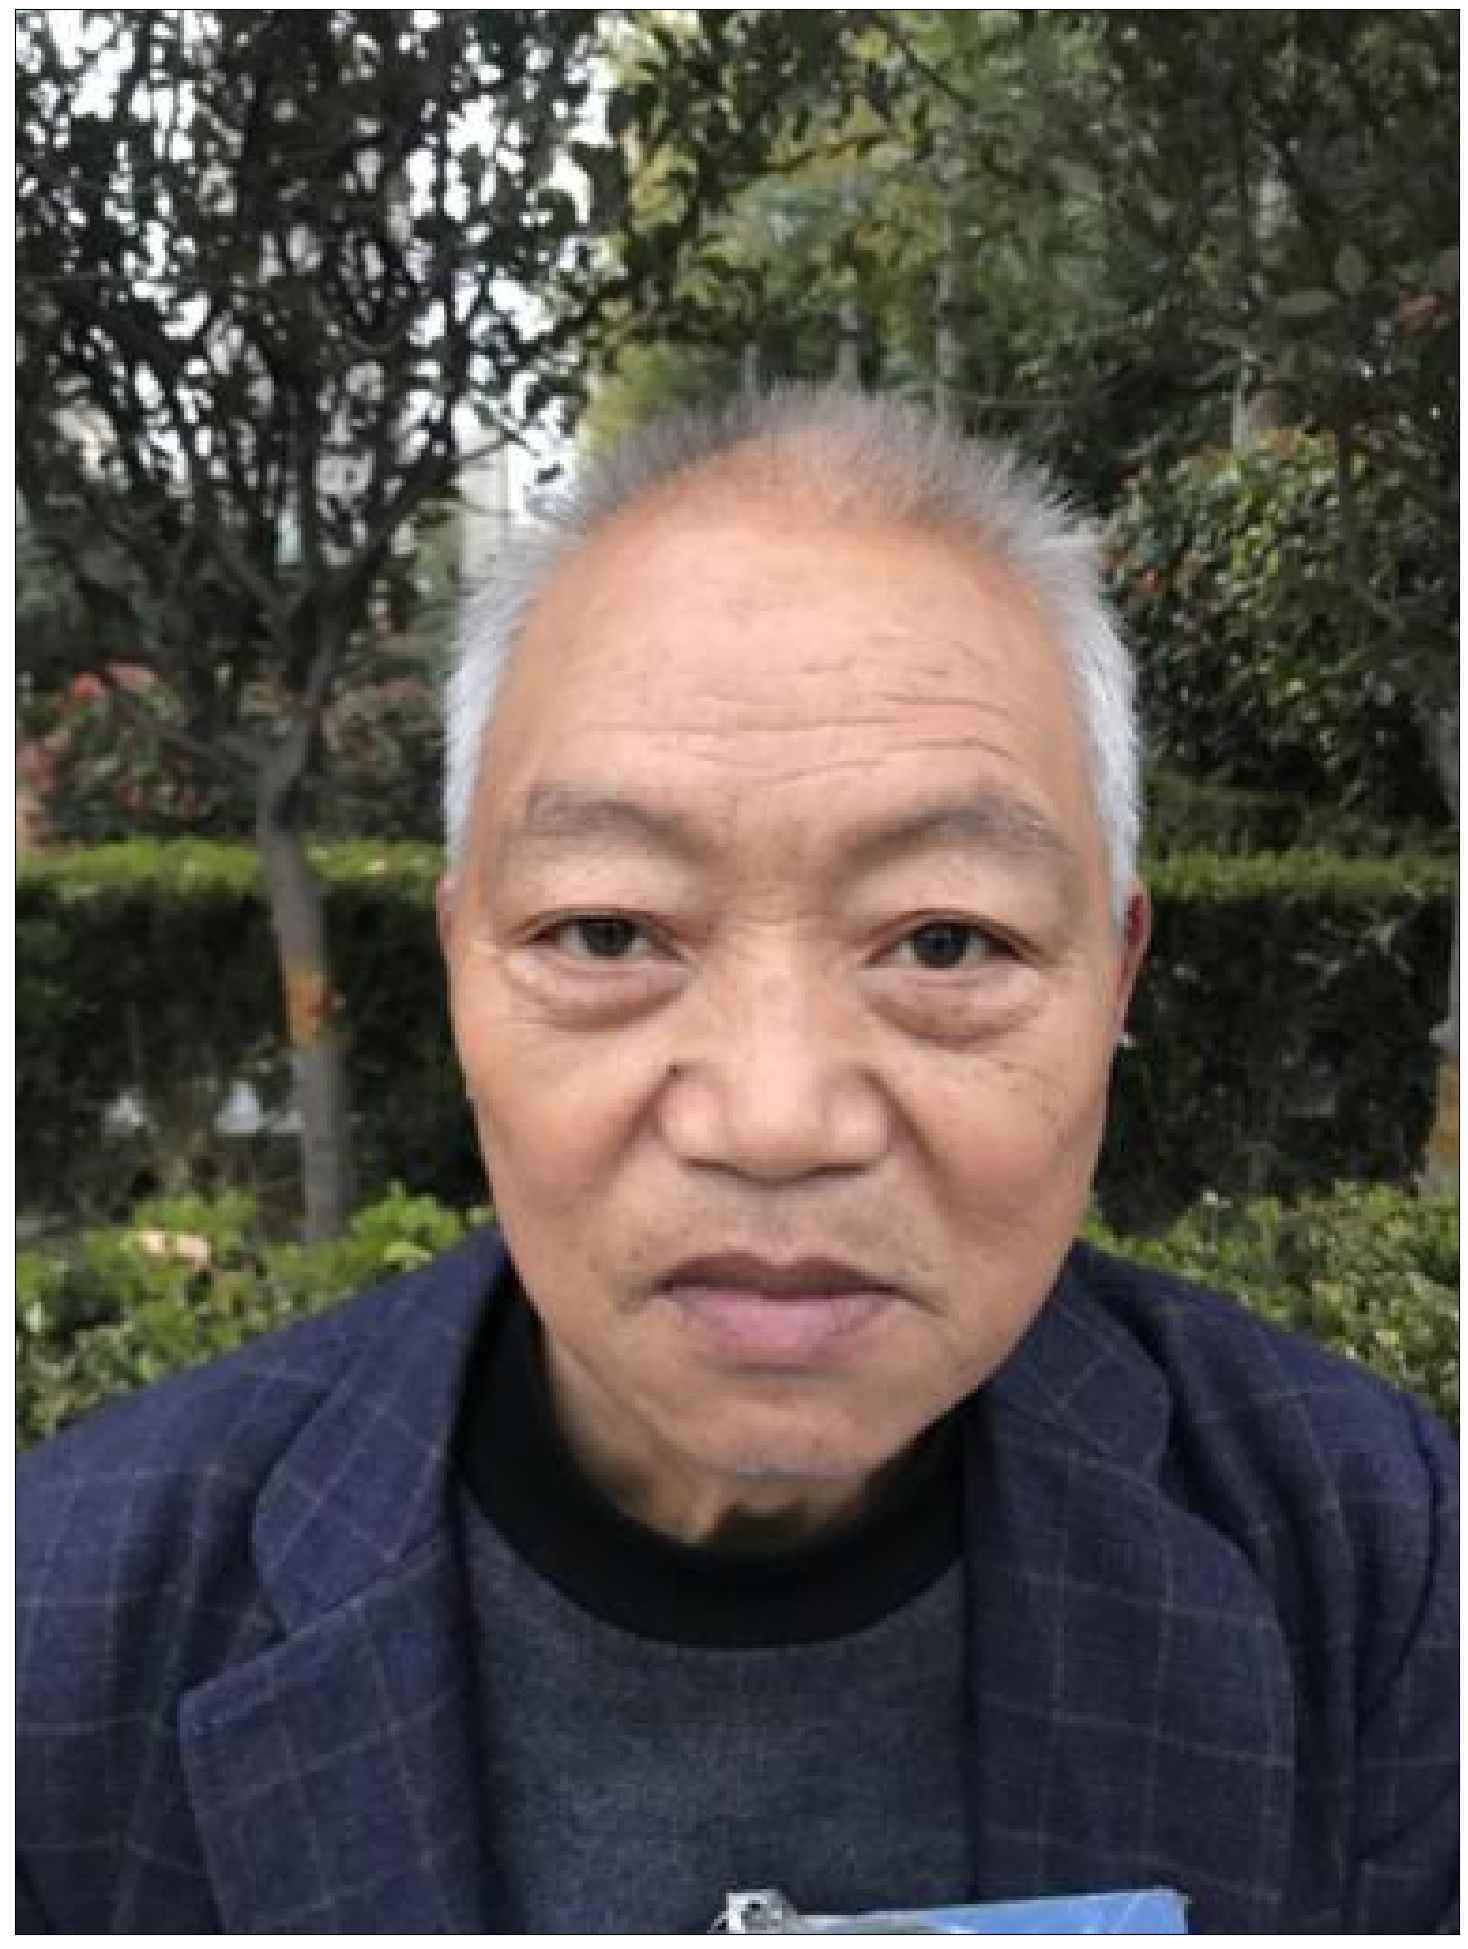

In [19]:
import cv2
import matplotlib.pyplot as plt

fig, ax = plt.figure(figsize=(25, 25), dpi=100)

img = cv2.imread(compare_df[compare_df['wrong_img']==1]['ImageID'][0])
b, g, r = cv2.split(img)
img2 = cv2.merge([r, g, b])

plt.imshow(img2)
plt.xticks([]) # x축 눈금
plt.yticks([]) # y축 눈금
plt.show()

In [5]:
compare_df[compare_df['wrong_img']==1]['ans_y'].value_counts()

1     466
4     367
2     173
16    136
13    127
10    100
3      73
7      68
0      52
8      21
15     19
6      17
9      12
5       7
14      7
12      6
11      3
Name: ans_y, dtype: int64

In [7]:
from torch.utils.data import DataLoader, Dataset
import torch
import os
import numpy as np
import random

import cv2

random_seed = 12
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.cuda.manual_seed_all(random_seed)  # if use multi-GPU
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)
random.seed(random_seed)

In [1]:
class TestDataset(Dataset):
	def __init__(self, img_paths, transform):
		self.img_paths = img_paths
		self.transform = transform

	def __getitem__(self, index):
		image = cv2.imread(self.img_paths[index])
		
		if self.transform is not None:
			augmented = self.transform(image = image)
			img = augmented['image']

		# img = Image.open(img_path).convert("RGB")

		# if self.transforms is not None:
		#     img = self.transforms(img)
				
		return img
     #    image = Image.open(self.img_paths[index])

     #    if self.transform:
     #        image = self.transform(image)
     #    return image

	def __len__(self):
		return len(self.img_paths)

dataset = TestDataset(image_paths, transform)
loader = DataLoader(dataset, shuffle=False, num_workers=2)

model_path = input("학습한 모델의 경로를 입력해주세요 : ")
model_listdir = os.listdir(model_path)
all_predictions = [[] for _ in range(len(loader))]
for moli in model_listdir:
	model = torch.load(os.path.join(model_path, moli))

NameError: name 'loader' is not defined